In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
x = iris.data
y = iris.target

In [4]:
from sklearn.model_selection import train_test_split

In [6]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.20,random_state=13)

In [7]:
xtrain.shape

(120, 4)

In [8]:
xtest.shape

(30, 4)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier(metric='euclidean')

In [13]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(metric='euclidean')

In [14]:
t = xtest[0].reshape(1,-1)

In [15]:
t

array([[5.7, 2.8, 4.5, 1.3]])

In [16]:
#now we want to find the closest neighbour for this sample

In [17]:
n,m = knn.kneighbors(t,n_neighbors=5,return_distance=True)

In [18]:
n

array([[0.3       , 0.31622777, 0.33166248, 0.37416574, 0.4       ]])

In [19]:
m

array([[ 7, 12, 74, 21, 58]], dtype=int64)

In [20]:
#n --> distance for the five closed neighbors

In [21]:
#m--> index no. of five closed neighbors

In [24]:
for i in m[0]:
    print(ytrain[i])

1
1
1
1
1


In [25]:
#all are from class 1

In [26]:
knn.predict(t)

array([1])

In [27]:
ytest[0]

1

In [28]:
#prediction on all the sample 
pred = knn.predict(xtest)
pred

array([1, 1, 0, 2, 2, 0, 2, 2, 0, 1, 1, 1, 1, 0, 2, 0, 1, 2, 1, 0, 1, 0,
       0, 2, 1, 2, 0, 2, 1, 2])

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(ytest,pred)

0.9

In [31]:
#missclassified samples index

In [32]:
import numpy as np

In [33]:
np.where(ytest!=pred)

(array([10, 11, 16], dtype=int64),)

how to decide the values of n_neighbours

In [34]:
#taking a dataset having more no. of samples

In [35]:
from sklearn.datasets import load_digits 

In [36]:
digit = load_digits()

In [37]:
x = digit.data
y = digit.target

In [38]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.20,random_state = 13)

In [39]:
xtrain.shape

(1437, 64)

In [41]:
knn = KNeighborsClassifier()

In [43]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [44]:
print(knn.score(xtest,ytest))

0.9833333333333333


In [45]:
#here the number of neighnbors

In [49]:
error=[]
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(xtrain,ytrain)
    accuracy_test = knn.score(xtest,ytest)
    test_error = 1 - accuracy_test
    error.append(test_error)

In [50]:
error

[0.01388888888888884,
 0.019444444444444486,
 0.019444444444444486,
 0.01666666666666672,
 0.01666666666666672,
 0.01666666666666672,
 0.01666666666666672,
 0.01666666666666672,
 0.01666666666666672,
 0.01388888888888884,
 0.01666666666666672,
 0.01666666666666672,
 0.01666666666666672,
 0.019444444444444486,
 0.019444444444444486,
 0.025000000000000022,
 0.025000000000000022,
 0.030555555555555558,
 0.030555555555555558,
 0.030555555555555558]

In [51]:
#plotting this bar

In [52]:
import matplotlib.pyplot as plt

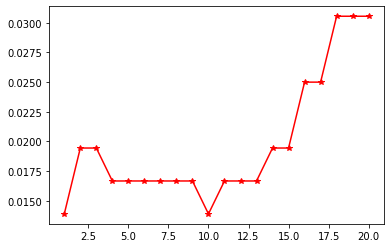

In [53]:
plt.plot(range(1,21),error,marker='*',color='red')

In [54]:
#if m=nos of neighbors = 10 then we are getting the least error rate

In [56]:
knn = KNeighborsClassifier(n_neighbors =10)
knn.fit(xtrain,ytrain)

score = knn.score(xtest,ytest)

In [57]:
print("The Score Is :",score)

The Score Is : 0.9861111111111112


In [58]:
#for determine the hyperParameter n_neighbors we have one more approach

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
# for determine the hyperparameter n_neighbors we have one more approach

In [63]:
knn = KNeighborsClassifier()

In [64]:
p = {'n_neighbors':[1,3,4,5,7]}

In [66]:
gd = GridSearchCV(knn,param_grid=p,scoring = 'accuracy')

In [67]:
gd.fit(xtrain,ytrain)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 4, 5, 7]}, scoring='accuracy')

In [68]:
gd.best_params_

{'n_neighbors': 3}

In [69]:
gd.score(xtest,ytest)

0.9805555555555555